<a href="https://colab.research.google.com/github/mehtasaurav/Drift-Detection-and-Adaptation-VIT-University/blob/main/RandomForest_10%25_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import time

In [22]:
from google.colab import files
import pandas as pd
# Upload the dataset file
uploaded = files.upload()
# Get the file name
file_name = next(iter(uploaded))
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_name)
# Print the shape and features of the dataset
print(df.shape)
print(df.columns)

Saving IoT_10_percent.csv to IoT_10_percent (2).csv
(6252, 33)
Index(['Unnamed: 0', 'Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port',
       'Timestamp', 'Flow_Duration', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Bwd_Pkt_Len_Max', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Std',
       'FIN_Flag_Cnt', 'Pkt_Size_Avg', 'Init_Bwd_Win_Byts', 'Idle_Mean',
       'Idle_Max', 'Idle_Min', 'Label'],
      dtype='object')


In [23]:
df_rounded = df.round()
# Split the dataset into features and target variable
X = df_rounded.drop('Label', axis=1)
y = df_rounded['Label']
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, train_size=0.8, random_state=31)


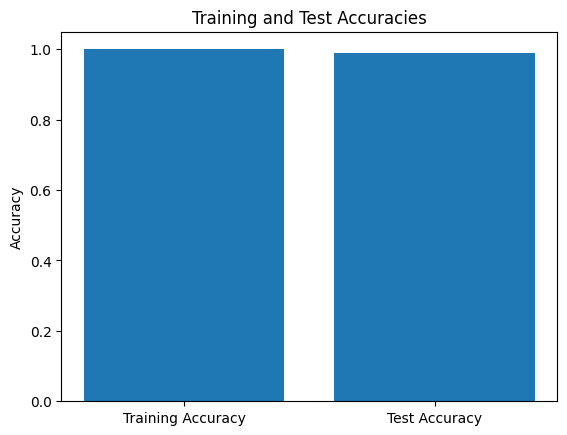

Training Accuracy: 1.0
Test Accuracy: 0.9904076738609112
Time Taken for Training (in seconds): 1.502810001373291
Time Taken for Testing (in seconds): 0.027665376663208008


In [24]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Start the timer for training
train_start_time = time.time()

# Train the model
rf.fit(X_train, y_train)

# Calculate the training accuracy
train_predictions = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the time taken for training
train_elapsed_time = time.time() - train_start_time

# Start the timer for testing
test_start_time = time.time()

# Calculate the test accuracy
test_predictions = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate the time taken for testing
test_elapsed_time = time.time() - test_start_time

# Create a bar graph for training and test accuracies
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies')
plt.show()

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Time Taken for Training (in seconds):", train_elapsed_time)
print("Time Taken for Testing (in seconds):", test_elapsed_time)


In [25]:
!pip install frouros

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [26]:
from frouros.detectors.data_drift import MMD
from frouros.detectors.concept_drift import DDM, DDMConfig

In [27]:
# Define and fit the model
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier())  # Replace XGBoost classifier with RandomForestClassifier
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [28]:
# Initialize variables to store accuracy and sample count
accuracy_values = []
sample_count = []

# Detector configuration and instantiation

config = DDMConfig(warning_level=2.0,
drift_level=3.0, min_num_instances=30)
detector = DDM(config=config)

In [29]:
# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
drift_count = 0
correct_predictions = 0 # Initialize variable to track correct predictions

for i, (X, y) in enumerate(zip(X_test, y_test)):
 y_pred = pipeline.predict(X.reshape(1, -1))
 correct_predictions += int(y_pred == y)
  # Calculate accuracy at each iteration
 accuracy = correct_predictions / (i + 1)

 # Append accuracy and sample count to respective lists
 accuracy_values.append(accuracy)
 sample_count.append(i + 1)

 error = 1 - int(y_pred == y)
 detector.update(value=error)
 status = detector.status
 if status["drift"]:
      drift_count += 1


Total Concept Drift Detected: 1040


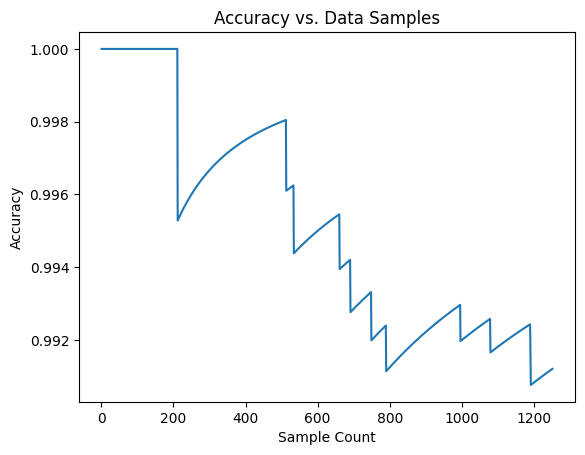

In [30]:
print("Total Concept Drift Detected:", drift_count)

# Plotting the accuracy vs. sample count
plt.plot(sample_count, accuracy_values)
plt.xlabel("Sample Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Data Samples")
plt.show()